in this notebook we are going to do text sentiment analysis using nltk
lets us first import all the usefull libraries which will help us throughout the process
problem statement:- we are given a dataset of the reviews of a product name alexa , we have to perform sentiment analysis on those reviews to see if they are positive or negative  

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud

In [ ]:
!pip install nltk
import nltk
nltk.download('all')



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/n

True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
from wordcloud import WordCloud

Now using pandas pd.read function we will first read the data , by providing the path of the file , here we are using delimiter "\t" becasue the file is a tsv (tab seprated value)

In [ ]:
dataset= pd.read_csv("/content/amazon_alexa.tsv" , delimiter='\t')

In [ ]:
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


it is always recommended to first analyze the dataset we are dealing with , so for that purpose let us understand the dataset first  

In [ ]:
dataset.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


as we observed data types of column are in object form, so for making it easy to apply some function we should convert them to desireable data type

In [ ]:
dataset=dataset.convert_dtypes()

note resetting the index is important as we are going  to use it later for merging

In [ ]:
dataset=dataset.reset_index()

seeing the results of dataset manipulation

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   Int64 
 1   date              3150 non-null   string
 2   variation         3150 non-null   string
 3   verified_reviews  3150 non-null   string
 4   feedback          3150 non-null   Int64 
dtypes: Int64(2), string(3)
memory usage: 129.3 KB


now let us do some EDA , firstly let us check how many reviews have 5 star rating , a histogram is a great way to do univariate analysis

<Axes: >

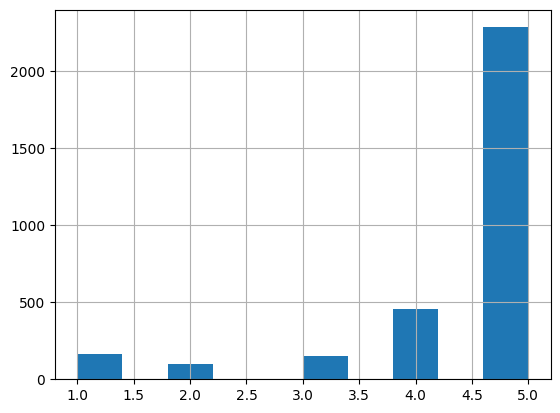

In [ ]:
dataset['rating'].hist()

now to extract more information , we try it with other variables

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Charcoal Fabric '),
  Text(1, 0, 'Walnut Finish '),
  Text(2, 0, 'Heather Gray Fabric '),
  Text(3, 0, 'Sandstone Fabric '),
  Text(4, 0, 'Oak Finish '),
  Text(5, 0, 'Black'),
  Text(6, 0, 'White'),
  Text(7, 0, 'Black  Spot'),
  Text(8, 0, 'White  Spot'),
  Text(9, 0, 'Black  Show'),
  Text(10, 0, 'White  Show'),
  Text(11, 0, 'Black  Plus'),
  Text(12, 0, 'White  Plus'),
  Text(13, 0, 'Configuration: Fire TV Stick'),
  Text(14, 0, 'Black  Dot'),
  Text(15, 0, 'White  Dot')])

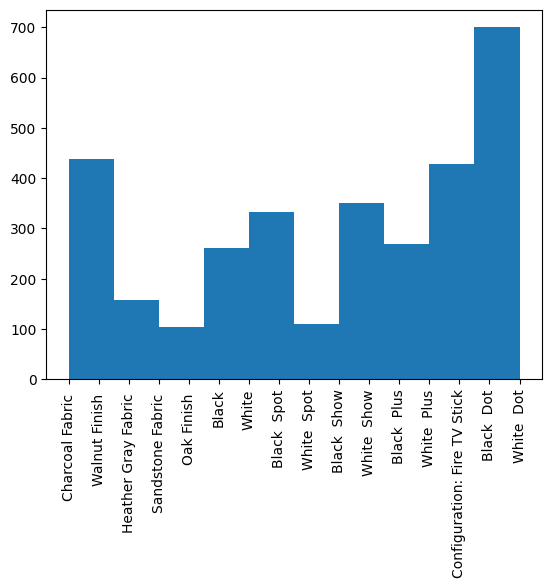

In [ ]:
plt.hist(dataset['variation'])
plt.xticks(rotation=90)


now we check the correlation between variables to get an idea of the dependencies of variables on one another , and we can infer that rating and the feedback are highly correlated  

In [ ]:
correlation_matrix = dataset.corr()

print(correlation_matrix)

            rating  feedback
rating    1.000000  0.861968
feedback  0.861968  1.000000


<ipython-input-86-bef6541da742>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


now lets perform the main task of analysis , nltk provides various methods to do nlp task , which can be tokenizing , finding part of speech and some other functions also , in a normal case where we want to perform more than just sentiment analysis we cloud have used that function , but here just to stay specific for the we can just use SIA and make its object

In [ ]:
sia= SentimentIntensityAnalyzer()

now we got a object sia , we can call a method called polarity_scores('data') to get the polarity scores , they lie between -1 and 1 where -1 is unsatisfied and 1 being happy/positive   

In [ ]:
sia.polarity_scores(dataset['verified_reviews'][301])

{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compound': 0.7339}

by the output of above cell now we can clearly see that what is the sentiment of the given text

In [ ]:
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
dataset['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: string

lets apply the polarity_score to each data-item in the reviews column , we do that by for loop

In [ ]:
answer ={}
for i in range(3150):
  data=dataset['verified_reviews'][i]
  answer[i]=sia.polarity_scores(dataset['verified_reviews'][i])


In [ ]:
data_answer=pd.DataFrame(answer)

we got the results , as the results were not in the requried format i applied the .T which simply means transpose

In [ ]:
data_answer=data_answer.T
data_answer

,neg,neu,pos,compound
0,0.000,0.308,0.692,0.6696
1,0.000,0.193,0.807,0.6360
2,0.102,0.784,0.114,-0.1280
3,0.000,0.617,0.383,0.9169
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
3145,0.000,0.620,0.380,0.6467
3146,0.000,1.000,0.000,0.0000
3147,0.028,0.735,0.237,0.9485
3148,0.087,0.827,0.087,0.0008


In [ ]:
data_answer

,neg,neu,pos,compound
0,0.000,0.308,0.692,0.6696
1,0.000,0.193,0.807,0.6360
2,0.102,0.784,0.114,-0.1280
3,0.000,0.617,0.383,0.9169
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
3145,0.000,0.620,0.380,0.6467
3146,0.000,1.000,0.000,0.0000
3147,0.028,0.735,0.237,0.9485
3148,0.087,0.827,0.087,0.0008


In [ ]:
data_answer=data_answer.reset_index()

to merge these results with initial data frame we do some modification on the index

In [ ]:
dataset

,index,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...,...
3145,3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
dataset=dataset.merge(data_answer)

In [ ]:
dataset

,index,rating,date,variation,verified_reviews,feedback,neg,neu,pos,compound
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.000,0.308,0.692,0.6696
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.000,0.193,0.807,0.6360
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.102,0.784,0.114,-0.1280
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.000,0.617,0.383,0.9169
4,4,5,31-Jul-18,Charcoal Fabric,Music,1,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
3145,3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,0.000,0.620,0.380,0.6467
3146,3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,0.000,1.000,0.000,0.0000
3147,3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,0.028,0.735,0.237,0.9485
3148,3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,0.087,0.827,0.087,0.0008


now , i dropped some columns which were not needed , we just keep the combined result

In [ ]:
dataset=dataset.drop(['feedback','neg','neu','pos'] , axis=1)

In [ ]:
dataset

,index,rating,date,variation,verified_reviews,compound
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,0.6696
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,0.6360
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",-0.1280
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,0.9169
4,4,5,31-Jul-18,Charcoal Fabric,Music,0.0000
...,...,...,...,...,...,...
3145,3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",0.6467
3146,3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",0.0000
3147,3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",0.9485
3148,3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,0.0008


to check whether the results are consistent , we plot a box plot of the polarity vs rating , as we know that a 5 star rating will have positive reviews we can easily cross verify the results

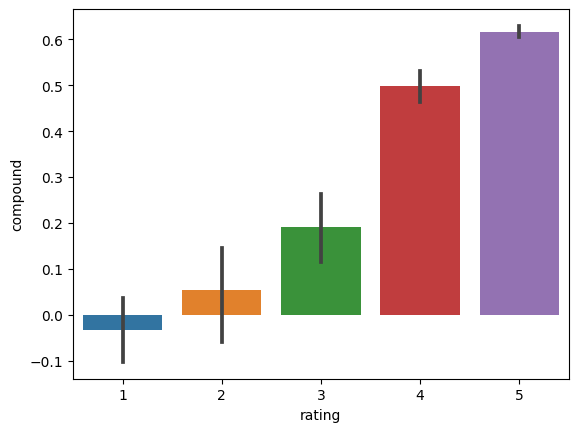

In [ ]:
ax = sns.barplot(data=dataset, x='rating', y='compound')
plt.show()

now i just tried to use word cloud on a single review which high positive value to check what words were used most commonly

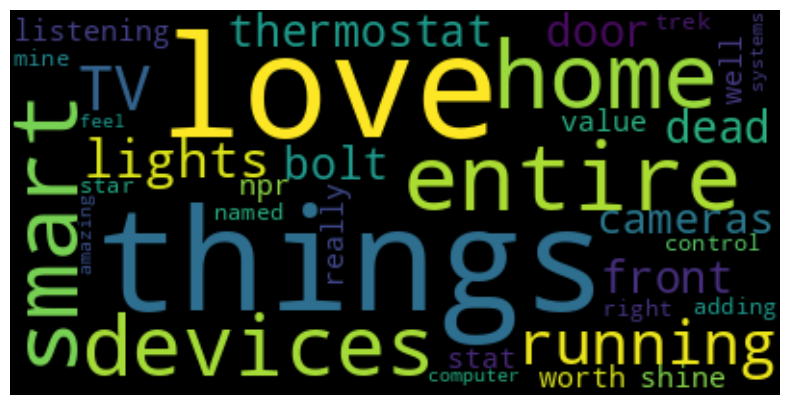

In [166]:
text=dataset['verified_reviews'][3147]
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


did the same with one  negative polarity value , we can apply this on the complete dataset and findout the words which are more prominent in negative review and positve review which can help in further analysis of the data

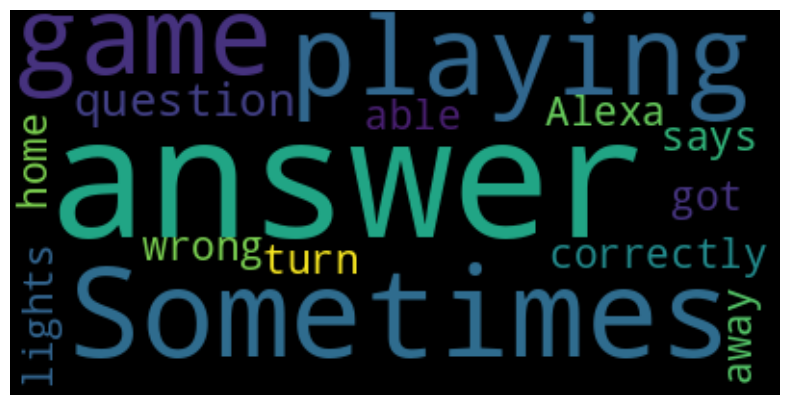

In [167]:
text2=dataset['verified_reviews'][2]
wordcloud = WordCloud().generate(text2)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
